# References
## McCurdy and Hamm 1994a
* Pair of MNs in the RC circuit: one is stimulated by injecting pulses of depolarizing current of 0.5 ms, ca. 7 Hz; Postsynaptic responses are recorded on the second impaled MN.
* Rostrocaudal distributions of recurrent inhibitory post-synaptic potentials amplitudes were obtained from pairs of motoneurons (Figure 3A). Amplitudes were determined from the difference between baseline level of activity in the resting membrane taken from the prestimulus period and the peak recurrent inhibitory post-synaptic potentials amplitude. This result obtained from all motoneurons, regardless of muscle innervated, but it is useful as an overall behavior.
* RIPSPs inversely correlated with distance between motoneurons (Kendall Tau correlation method, $\tau$=0.154, P=0.028 for MG)
* The distance that separated the 180 pairs of motoneurons measured ranged form 86 $\mu$m to 4.7 mm.
* Mean of significant recurrent inhibitory post-synaptic potentials of -41.36 $\pm$ 7.19 in close pairs and -19.63 $\pm$ 2.42 in distant pairs ($\mu$V). This classification is based on the boundary value of 1.0 mm, even though it is a debatable value, as discussed by the authors.
* Amplitudes and durations for this sample are comparable with those found by Hamm et al. (1987a).

## Uchiyama et al. (2003a)
* Number of Renshaw cells associated with the medial gastrocnemius $\alpha$ motoneuron pool is arbitrarily assumed to be 300, but it is not too far away from what has been studied in the literature.
* Topographic distribution according to a gaussian centered in the motoneuron and with standard deviation of 1/6 mm for motoneurons and 3.5/3 mm for Renshaw cells.
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* The stimulation rate used by McCurdy and Hamm (1994a) does not allow for the motoneuron-Renshaw cell synapse to fully recover from the post-synaptic depression described in Hultborn and Pierrot-Deseiligny (1979). Therefore, amplitudes reported are probably underestimated a bit. This is just a complication I should not wasto too much time on, though.
* The distances considered in the simulations included the whole range available whithin 0 to 4.7 mm. Furthermore, only 180 pairs, randomly choosed, were considered. These made the simulation simpler and faster.
* The value of 6 mm used here is the length of the medial gastrocnemius neuronal column in the cat.
* McCurdy and Hamm (1994a) used stimulations 0.5 ms long with ca. 7 Hz. I used only a soma stimulation with a single pulse because the period of the stimulation described in the paper is enough for the model to go back to resting membrane state. I imagine they used a periodic stimulation to make averages.
* The mean values adopted here are the significant ones, because they certainly caused be the recurrent inhibition circuit.
* The parameters were adjusted to obtain results that are as close as possible to those reported in literature.
* The boundary zone adopted was 1.0 mm.
* Parametrization with only weight decay:
    * $g_{max_{FF}}$ = 0.0275.
    * Small conductances values ($<$0.0275) could not generate higher amplitudes properly and therefore were not adopted.
    * The results in the simulations of Hamm et al. (1987ab) using this value is not that good, but I think it is as good as it can be.
* Parametrization with probability of connection decaying with distance:
    * $g_{max_{FF}}$ = 0.025.
    * This simulation is complicated because each run can involve quite different populations of motoneurons. In fact, in a few simulations, increase in recurrent inhibitory post synaptic potentials with increasinig distance were observed.
    * With values higher than 0.0254, the values obtained are too high, probably because it causes more excitability from motoneurons on Renshaw cells. The value chosen yields lower values (lower than what is described in literature), but it is better than the other.
    * From Hamm et al. (1987ab) simulations, the decay in the negative distance does not seem to occur with distance. IN fact, it seems to increase. Whether motoneuron size can affect decay more than topography factors is not studies yet, and this approach is doubtful.
    * This set does not seem to be worth the effort.
* Parametrization with probability of connection and weight decaying with distance:
    * $g_{max_{FF}}$ = 0.04.
    * Maybe this is a better setting, but no solid confirmation so far.
* Parametrization with maximum probability different from 100% and weight decay:
    * $g_{max_{FF}}$ = 0.055.
    * No big reason to use. Not a correct mean value for distant pairs, just like the other parametrizations.
* Parametrization with maximum probability different from 100%, weight decay and probability of connection decay with distance:
    * $g_{max_{FF}}$ = 0.06.
    * Same observations as previous ones.
* NB. It can be difficult to make parametrizations for this conductance because it is know that some motoneurons can elicit only a few spikes, while sometimes a single motoneuron can at times provoke bursts (Ross et al., 1982).

In [1]:
import sys
sys.path.append('Parametrizations/Population')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
import glob

In [2]:
simDuration_ms = 50
timeStep_ms = 0.05
t = np.arange(0, simDuration_ms, timeStep_ms)
nMN = 300

In [3]:
boundary = 4.7
RIPSPs = []
distances = []
positions = []
recordedMN = []
MNsignal = np.zeros((len(t), nMN))
files=glob.glob("*.dat") # Responsable for getting only MNV files

filename = 'positions.dat'
files.remove(filename)

f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    positions.append(float(line.split()[0]))
f.close()

for filename in files:
    f = open(filename, 'r')
    lines = f.readlines()
    for i, line in enumerate(lines):
        MNsignal[i,:] = np.array([float(x) for x in line.split()])
    f.close()
    
    peaks = [min(MNsignal[:,x]) for x in range(MNsignal.shape[1])]
    stimulatedMNIndex = int(filename[3:6])-1 # -1 because array starts in 0 in Python
    availableMNsIndex = range(nMN)
    del availableMNsIndex[stimulatedMNIndex]
    recordedCount = 0
    
    while recordedCount < 13:
        # Random choice to get approximately 180 pairs (14*13=182)
        MNCandidateIndex = np.random.choice(availableMNsIndex)
        distance = positions[MNCandidateIndex] - positions[stimulatedMNIndex]
        # Ignore recordings out of the boundary or repeated recordings
        if abs(distance)>boundary or MNCandidateIndex in recordedMN:
            continue
        recordedMN.append(MNCandidateIndex)
        distances.append(distance)
        RIPSPs.append(peaks[MNCandidateIndex])
        recordedCount+=1

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


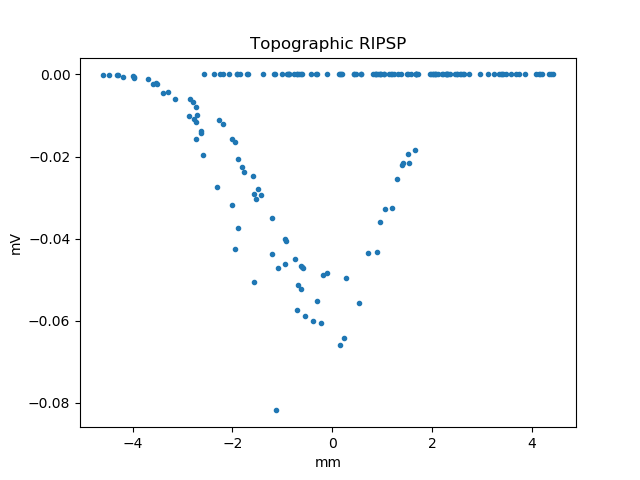

In [4]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.xlabel('mm')
plt.ylabel('mV')
plt.show()

In [7]:
cutoff_value = 1.4

closeidx = [x for x in range(len(distances)) if abs(distances[x])<=cutoff_value]
close_pairs = [RIPSPs[x] for x in closeidx if RIPSPs[x] != 0.0]
distantidx = [x for x in range(len(distances)) if abs(distances[x])>cutoff_value]
distant_pairs = [RIPSPs[x] for x in distantidx if RIPSPs[x] != 0.0]

In [8]:
RIPSP_close = np.mean(close_pairs)
RIPSP_distant = np.mean(distant_pairs)

print 'Mean RIPSP in close pairs (micro Volts): '+str(RIPSP_close*1e3)
print 'Mean RIPSP in distant pairs (micro Volts): '+str(RIPSP_distant*1e3)

Mean RIPSP in close pairs (micro Volts): -47.895096774193554
Mean RIPSP in distant pairs (micro Volts): -14.61191489361702
